In [1]:
import sys
sys.path.append('/users/loulou/cedia/srd/Model/')

## Importation du module

In [2]:
import srd

## Intialisation d'un ménage

On doit d'abord initialiser un ménage. Ici nous supposerons un couple avec deux membres ayant l'âge de 45 ans et aucun revenus. 

In [3]:
jean = srd.Person(age=45,earn=0)
pauline = srd.Person(age=45,earn=0)

On les insère dans un ménage vivant au Québec

In [4]:
hh = srd.Hhold(jean,pauline,prov='qc')

On peut voir le profil de chacun des membres du ménage en utilisant vars(): 

In [5]:
vars(jean)

{'age': 45,
 'male': True,
 'inc_earn': 0,
 'inc_rpp': 0,
 'inc_cpp': 0,
 'inc_othtax': 0,
 'inc_othntax': 0,
 'inc_rrsp': 0,
 'con_rrsp': 0,
 'years_can': None,
 'inc_self_earn': 0,
 'disabled': False,
 'cqppc': None,
 'widow': False,
 'asset': 0,
 'dc_exp0_7': 0,
 'dc_exp8_16': 0,
 'oas_years_post': 0,
 'inc_oas': 0.0,
 'inc_gis': 0.0,
 'inc_social_ass': 0.0,
 'allow_couple': 0,
 'allow_surv': 0,
 'fed_return': None,
 'pro_return': None,
 'payroll': None,
 'net_inc': 0.0,
 'disp_inc': 0.0}

## Calcul des prestations d'aide sociale


In [6]:
from srd import payroll
payroll_prog = payroll(2016)
payroll_prog.compute(hh)

In [7]:
from srd import federal
fed_form = federal.form(2016)
fed_form.file(hh)

In [8]:
from srd import assistance

In [9]:
ass_prog = assistance.program(2016)

In [10]:
ass_prog.apply(hh)

11580.0

In [11]:
2500 + 7476

9976

## Expérience

On peut faire des expériences assez complexe. La première serait de regader l'impôt provincial payé si on incrémente les revenus de travail

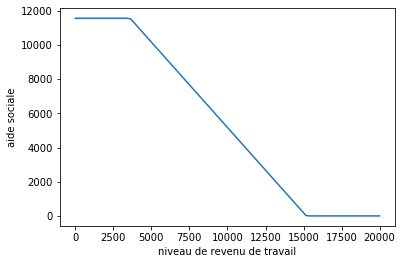

In [12]:
earns = np.linspace(0.0,20e3,100)
aide = []
for earn in earns:
    jean.inc_earn = earn
    aide.append(ass_prog.apply(hh))
from matplotlib import pyplot as plt
plt.figure()
plt.plot(earns,aide)
plt.xlabel('niveau de revenu de travail')
plt.ylabel('aide sociale')
plt.show()

In [13]:
from srd import calculators

In [14]:
tax = srd.tax(2016)

In [15]:
jean.inc_earn = 0.0
pauline.inc_earn = 0.0

In [16]:
tax.compute(hh)

In [17]:
tax.dispinc(hh)

In [18]:
jean.disp_inc

5790.0

In [19]:
pauline.disp_inc

5790.0